In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("D:/Data Analytics/PORTFOLIO_PROJECTS/_python_/web_scraping/flipkart_cleaned.csv")
df

,Product Name,Brand,Prices,RAM,ROM,Ratings
0,"Motorola G34 5G (Ocean Green, 128 GB)",Motorola,11999,8 GB RAM,128 GB ROM,4.2
1,"POCO C65 (Pastel Blue, 128 GB)",Poco,6799,4 GB RAM,128 GB ROM,4.3
2,"Motorola G34 5G (Charcoal Black, 128 GB)",Motorola,11999,8 GB RAM,128 GB ROM,4.2
3,"Motorola G34 5G (Ice Blue, 128 GB)",Motorola,11999,8 GB RAM,128 GB ROM,4.2
4,"POCO C65 (Matte Black, 128 GB)",Poco,6799,4 GB RAM,128 GB ROM,4.3
...,...,...,...,...,...,...
805,"REDMI 12C (Royal Blue, 128 GB)",Redmi,9358,6 GB RAM,128 GB ROM,4.1
806,"vivo X100 (Asteroid Black, 512 GB)",VIVO,69999,16 GB RAM,512 GB ROM,4.6
807,"Apple iPhone 13 (Pink, 256 GB)",Apple,59999,Unknown,256 GB ROM,4.6
808,"Google Pixel 7 (Snow, 128 GB)",Google,42999,8 GB RAM,128 GB ROM,4.3


In [5]:
# Computing basic summary statistics (mean, median, min, max, std, etc.)
print(df.describe())

              Prices     Ratings
count     810.000000  810.000000
mean    21076.237037    4.238272
std     19870.056749    0.382519
min         0.000000    0.000000
25%      9490.000000    4.200000
50%     14499.000000    4.300000
75%     24999.000000    4.400000
max    158990.000000    5.000000


In [6]:
# Importing library for visualizations
import matplotlib.pyplot as plt

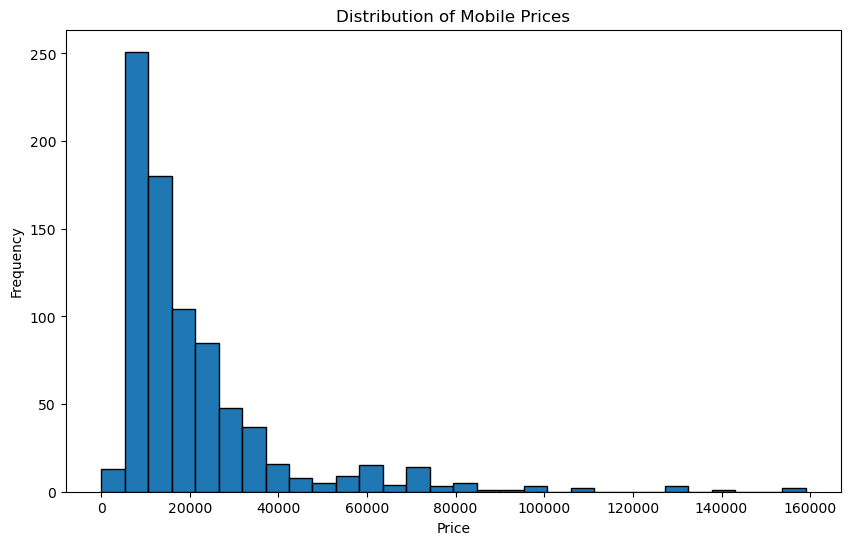

In [7]:
# DATA DISTRIBUTION
# 1.Distribution of Prices to understand the range and common price points.
plt.figure(figsize=(10, 6))
plt.hist(df['Prices'], bins=30, edgecolor='black')
plt.title('Distribution of Mobile Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

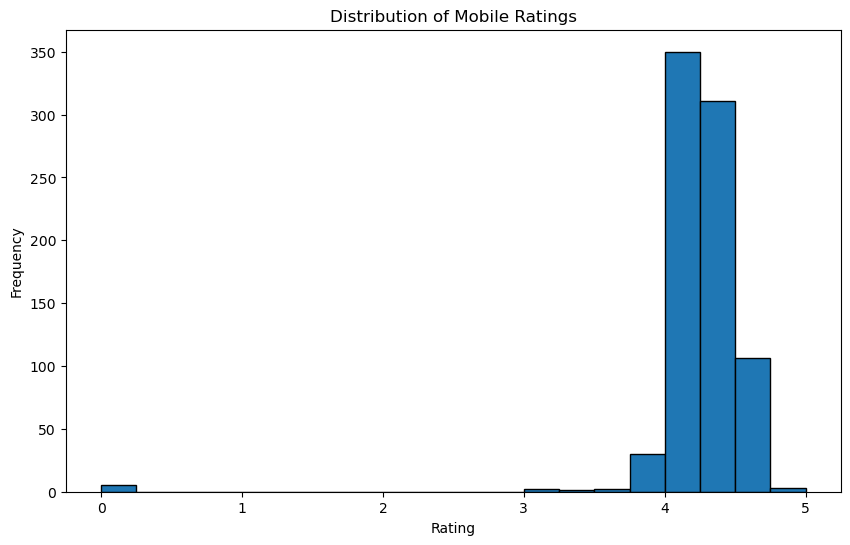

In [8]:
# 2.Distribution of Ratings to see the spread of user ratings.
plt.figure(figsize=(10, 6))
plt.hist(df['Ratings'], bins=20, edgecolor='black')
plt.title('Distribution of Mobile Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

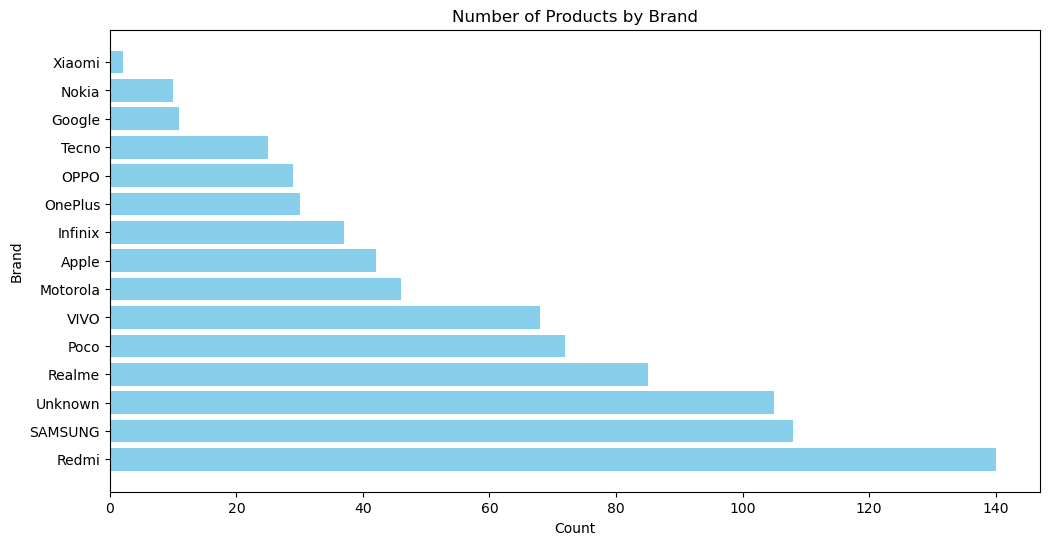

In [9]:
# BRAND ANALYSIS
# 1.Top Brands by Count to count the number of products by each brand.
plt.figure(figsize=(12, 6))
brand_counts = df['Brand'].value_counts()
plt.barh(brand_counts.index, brand_counts.values, color='skyblue')
plt.title('Number of Products by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

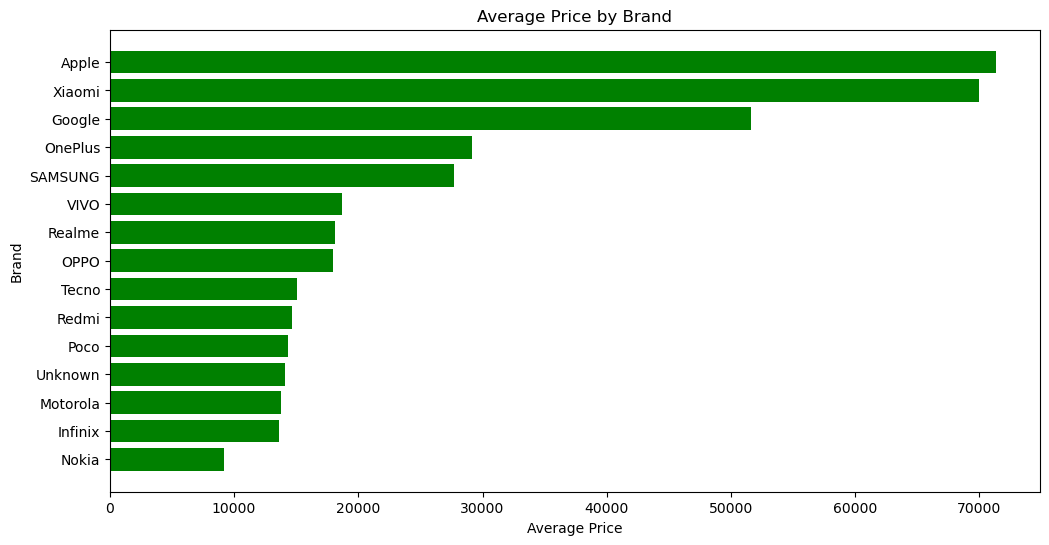

In [10]:
# 2.Plotting Average Price of mobiles by Brand
plt.figure(figsize=(12, 6))
avg_price_by_brand = df.groupby('Brand')['Prices'].mean().sort_values()
plt.barh(avg_price_by_brand.index, avg_price_by_brand.values, color='green')
plt.title('Average Price by Brand')
plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.show()

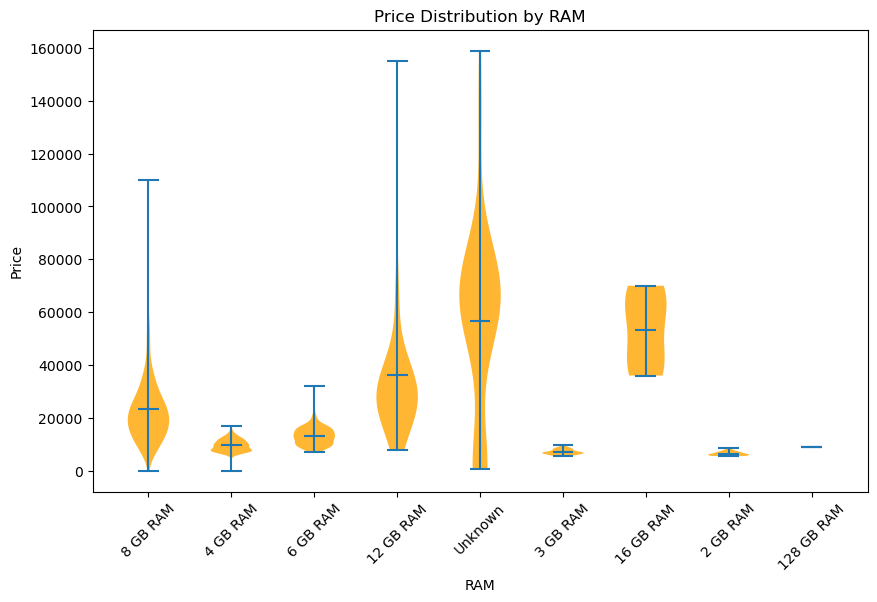

In [11]:
# RAM & ROM ANALYSIS
# 1.RAM vs Price using Violin Plot to analyze how the amount of RAM affects the price
plt.figure(figsize=(10, 6))
parts = plt.violinplot([df[df['RAM'] == ram]['Prices'] for ram in df['RAM'].unique()], showmeans=True)

color = 'orange'
for pc in parts['bodies']:
    pc.set_facecolor(color)
    pc.set_alpha(0.8)

plt.xticks(range(1, len(df['RAM'].unique()) + 1), df['RAM'].unique(), rotation=45)
plt.title('Price Distribution by RAM')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()

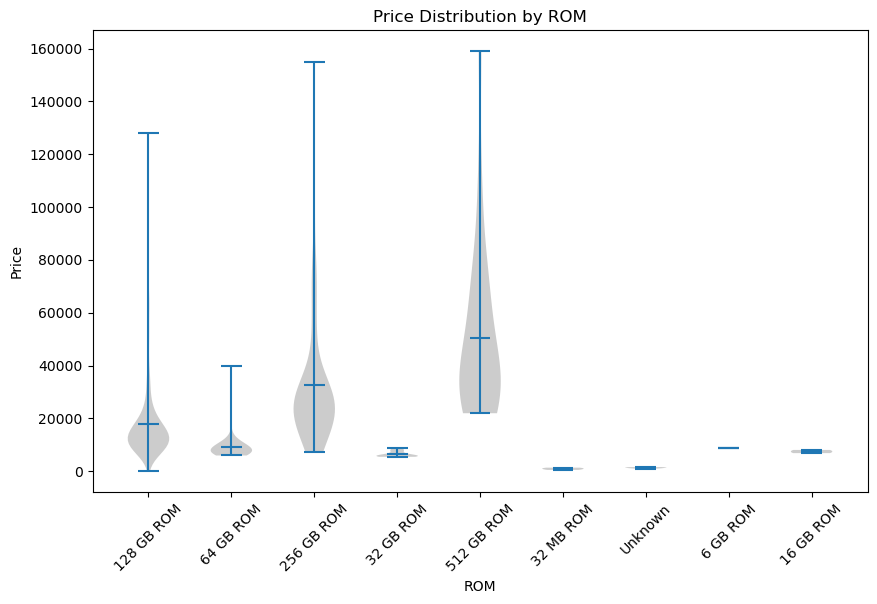

In [12]:
# 2.ROM vs Price using Violin Plot to analyze how the amount of ROM affects the price.
plt.figure(figsize=(10, 6))
parts = plt.violinplot([df[df['ROM'] == rom]['Prices'] for rom in df['ROM'].unique()], showmeans=True)

color = 'silver'
for pc in parts['bodies']:
    pc.set_facecolor(color)
    pc.set_alpha(0.8)

plt.xticks(range(1, len(df['ROM'].unique()) + 1), df['ROM'].unique(), rotation=45)
plt.title('Price Distribution by ROM')
plt.xlabel('ROM')
plt.ylabel('Price')
plt.show()

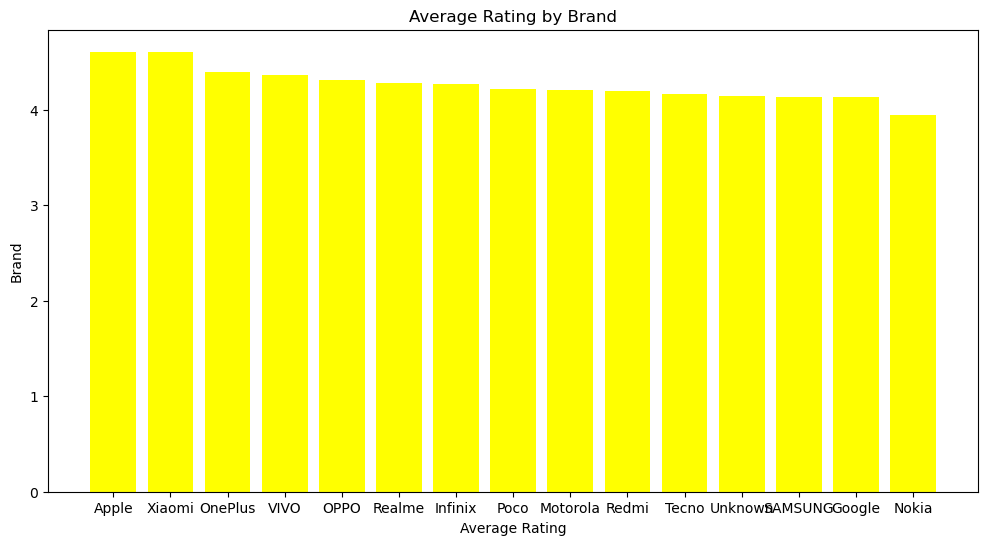

In [13]:
# RATINGS ANALYSIS
# 1.Top Rated Brands by plotting the average rating for each brand
plt.figure(figsize=(12, 6))
avg_rating_by_brand = df.groupby('Brand')['Ratings'].mean().sort_values(ascending = False)
plt.bar(avg_rating_by_brand.index, avg_rating_by_brand.values, color='yellow')
plt.title('Average Rating by Brand')
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.show()

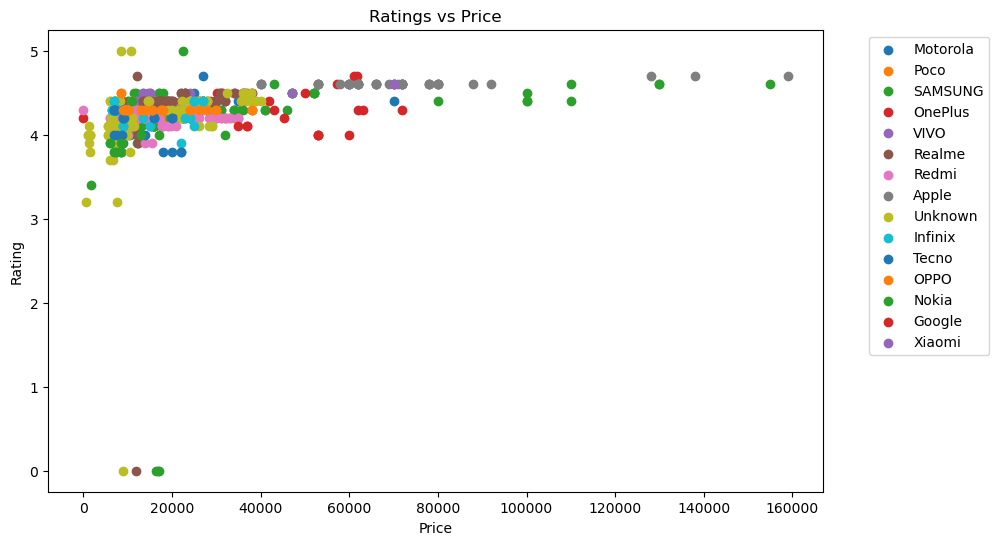

In [14]:
# 2.Ratings vs Price to see the relationship between price and ratings.
plt.figure(figsize=(10, 6))
for brand in df['Brand'].unique():
    subset = df[df['Brand'] == brand]
    plt.scatter(subset['Prices'], subset['Ratings'], label=brand)

plt.title('Ratings vs Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()